# Data Scientist Associate Practical Exam Submission

Use this template to complete your analysis and write up your summary for submission.


## Task 1 
The dataset contains ***1500 rows and 8 columns*** with missing values before cleaning. I have validated all the columns against the criteria in the dataset table:

-  owned: Same as description without missing values.
-  make_model: Same as description without missing values.
-  review_month: the values indicate the month of the review as well as the day, so I replace the values so that they only indicate the month of the review so that it matches the description.
-  web_browser: 50+ missing values, so I replace missing values with 'unknown'.
-  reviewer_age: 50+ missing values (noted by the value '-'), so I replace missing values with the average reviewer age, and convert it into integer data type.
-  primary_use: Same as description without missing values.
-  value_for_money: no missing values but the values are in object data type, so I remove '/10' from every string and I convert them back into integer data type.
-  overall_rating: Same as description without missing values.
After the data validation, the dataset contains 1500 rows and 8 columns.

In [218]:
import pandas as pd 
import numpy as sns 
import matplotlib.pyplot as plt 
import matplotlib.style as style
import seaborn as sns 
df = pd.read_csv('electric_bike_ratings_2212.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   owned            1500 non-null   int64  
 1   make_model       1500 non-null   object 
 2   review_month     1500 non-null   object 
 3   web_browser      1350 non-null   object 
 4   reviewer_age     1500 non-null   object 
 5   primary_use      1500 non-null   object 
 6   value_for_money  1500 non-null   object 
 7   overall_rating   1500 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 93.9+ KB


### Validate the categorical variables

In [219]:
cat = ['owned','make_model','review_month','web_browser','primary_use','value_for_money']
for column in cat:
  print(df[column].value_counts())

1    890
0    610
Name: owned, dtype: int64
Nielah-Eyden     652
Lunna-Eyden      329
Lunna-Keetra     178
Hoang-Keetra     124
Hoang-Eyden      124
Nielah-Keetra     93
Name: make_model, dtype: int64
Sep       73
Mar       72
May       68
Nov       67
Apr       65
          ..
10-Jul     1
18-Aug     1
14-Apr     1
20-Sep     1
06-Aug     1
Name: review_month, Length: 332, dtype: int64
Chrome     698
IE         239
Firefox    233
Safari     133
Opera       24
Android     23
Name: web_browser, dtype: int64
Commuting    1095
Leisure       405
Name: primary_use, dtype: int64
5/10     387
6/10     323
4/10     315
3/10     183
7/10     167
2/10      53
8/10      52
1/10      11
9/10       8
10/10      1
Name: value_for_money, dtype: int64


### Validate the numeric variables

In [220]:
display(df['overall_rating'].describe())
display(df['reviewer_age'].unique())

count    1500.000000
mean       17.138907
std         2.445566
min        11.690000
25%        15.320000
50%        18.240000
75%        18.840000
max        22.760000
Name: overall_rating, dtype: float64

array(['23', '24', '28', '41', '33', '47', '20', '32', '35', '22', '29',
       '39', '42', '36', '40', '27', '48', '34', '16', '21', '25', '30',
       '-', '46', '37', '31', '17', '44', '26', '38', '49', '50', '45',
       '19', '43', '18'], dtype=object)

### Check for missing values in columns

In [221]:
df.isna().sum()

owned                0
make_model           0
review_month         0
web_browser        150
reviewer_age         0
primary_use          0
value_for_money      0
overall_rating       0
dtype: int64

### Clean web_browser and reviewer_age columns

In [222]:
df['web_browser'] = df['web_browser'].fillna('unknown')
mean_reviewer_age = df.loc[df['reviewer_age']!= '-', 'reviewer_age'].astype('int').mean()
df['reviewer_age']= df['reviewer_age'].replace('-',mean_reviewer_age)
df['reviewer_age'] = df['reviewer_age'].astype('int')
print(df.reviewer_age.describe())

count    1500.000000
mean       32.556000
std         9.876769
min        16.000000
25%        24.000000
50%        32.000000
75%        41.000000
max        50.000000
Name: reviewer_age, dtype: float64


### Clean value_for_money and review_month columns

In [223]:
df['value_for_money']= df['value_for_money'].str.removesuffix('/10')
df['value_for_money']= df['value_for_money'].astype('int')

df['review_month'] = df['review_month'].replace( "[\d-]",'', regex=True)
display(df['review_month'].unique())


array(['Oct', 'Jun', 'Nov', 'Sep', 'Aug', 'Mar', 'Jul', 'Apr', 'Dec',
       'Feb', 'Jan', 'May'], dtype=object)

## Task 2
From  **Graph 1 Count of owned**, the most number of reviews were given by owners (890 reviews were given by owners and 610 reviews were given by non-owners). Therefore, the imbalanced class issue is mild, so we decided not to address this issue at this point.

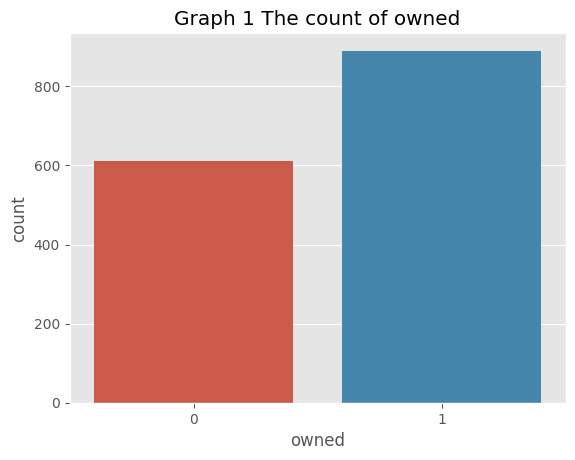

In [224]:
style.use('ggplot')
sns.countplot(data= df , x='owned').set(title = 'Graph 1 The count of owned')
plt.show()

## Task 3
From **Graph 2 The distribution of the overall rating**, we can see that the overall rating feature has a left skewed distribution, meaning on average there are more high overall ratings (with a peak around 19) than low overall ratings

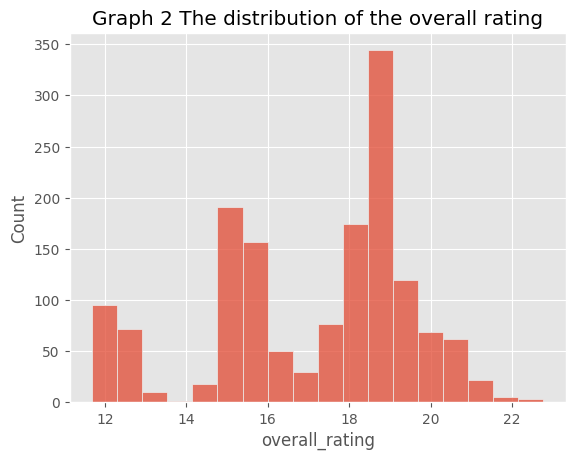

In [225]:
sns.histplot(data= df , x='overall_rating',).set(title = 'Graph 2 The distribution of the overall rating')
plt.show()

## Task 4
From **Graph 3 The Boxplot between owernship and overall rating**, we can see that owners tend to have a higher overall rating than non-owners.

### Inspecting the relationship betwenn ownership and overall rating

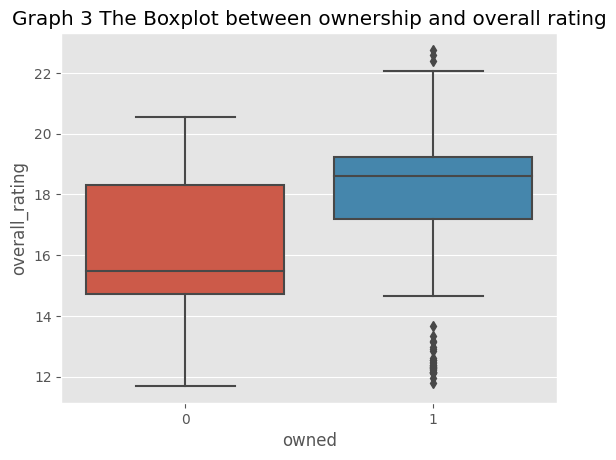

In [226]:
sns.boxplot(data = df , x='owned', y='overall_rating').set(title = 'Graph 3 The Boxplot between ownership and overall rating')
plt.show()

### Make changes to enable model fitting
    

Finally to enable model fitting, I have made the following changes:
- Convert all categorical variable into numeric variables

In [227]:
features = df.drop('owned', axis=1)
X= pd.get_dummies(features , columns=['make_model', 'review_month', 'web_browser', 'primary_use'])
y=df['owned']

## Task 5
Predicting whether a review came from an owner or not is a **classification problem** in machine learning. 

In [228]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

## Task 6
Baseline Model - Logistic Regression Model

In [229]:
lr = LogisticRegression()
lr.fit(X_train , y_train)
y_pred_lr = lr.predict(X_test)

## Task 7
Comparision Model - Random Forest Model

In [230]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


## Task 8
I am choosing the **Logistic Regression model** as a baseline model because it is simple and efficient to train and interpret. The comparison model I am choosing is the **Random Forest model** because it can capture more complex relationship between the input features and the target variables.

## Task 9
I am choosing **accuracy** to evaluate the model because they are easy to interpret. Accuracy focuses on correct predictions of all predictions.

### Evaluating Logistic Regression Model

In [231]:
print(accuracy_score(y_test, y_pred_lr, ))

0.7177777777777777


### Evaluating Random Forest Model

In [232]:
print(accuracy_score(y_test, y_pred_rf, ))

0.7311111111111112


## Task 10
The Random Forest Model is performing slightly better than the Logistic Regression model because it has a higher accuarcy score meaning the Random Forest model predicts more correctly whether a review came from an owner or not.

## ✅  When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review the grading rubric. Have you included everything that will be graded?
- Head back to the [Certification dashboard](https://app.datacamp.com/certification) to submit your practical exam